In [1]:
#Change md in line 25 to test different max_depth settings

In [2]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("CS98XClassificationTrain.csv")
test = pd.read_csv("CS98XClassificationTest.csv")

In [4]:
train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [6]:
train["top genre"].value_counts()

adult standards       68
album rock            66
dance pop             61
glam rock             16
brill building pop    16
                      ..
louisiana blues        1
british dance band     1
mellow gold            1
baroque pop            1
britpop                1
Name: top genre, Length: 86, dtype: int64

In [7]:
sample_nas = train[train.isnull().any(axis=1)].head()
sample_nas

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,NaN
26,27,Drinks On The House,Green Martini Keys,2016,97,16,57,-16,11,15,181,100,5,28,NaN
72,73,Pachuko Hop,Ike Carpenter Orchestra,2006,83,53,48,-9,34,80,135,59,3,28,NaN
90,91,Little Things Means A Lot,Jayne Mansfield,2008,109,29,70,-15,16,63,172,36,4,29,NaN


In [8]:
#drop rows with missing values
train = train.dropna()

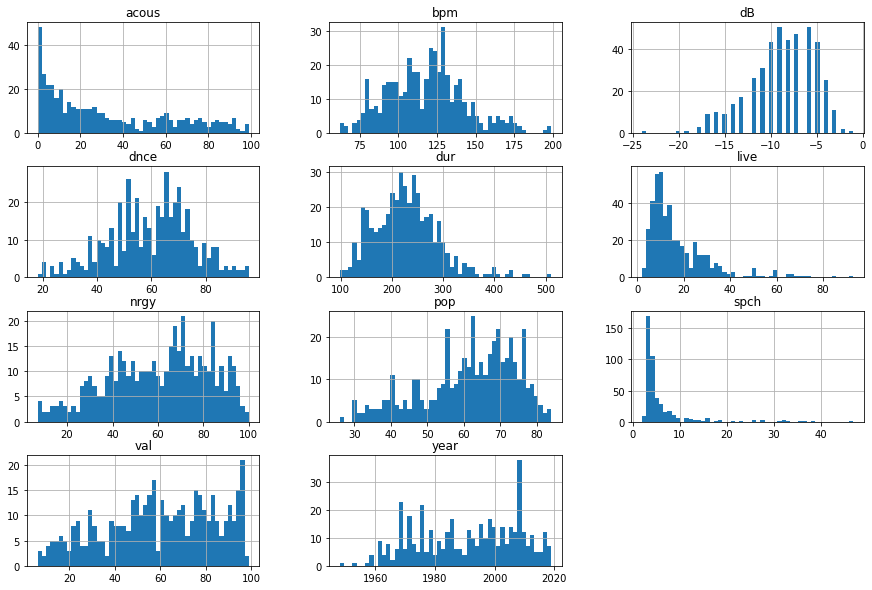

In [9]:
%matplotlib inline
train.drop(['Id'],axis=1).hist(bins=50, figsize=(15,10))
plt.show()

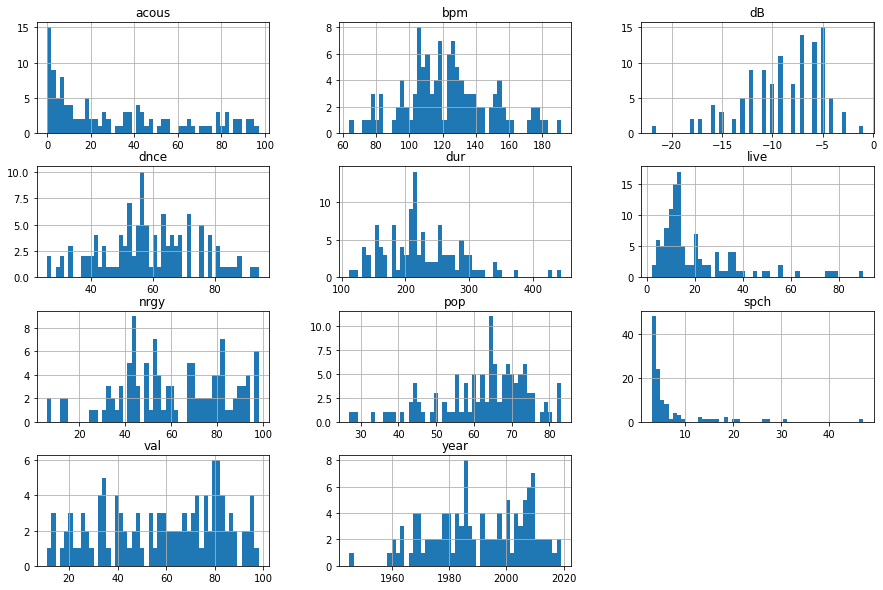

In [10]:
%matplotlib inline
test.drop(['Id'],axis=1).hist(bins=50, figsize=(15,10))
plt.show()
#test and train set roughly follow the same distribution

In [11]:
test.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [12]:
train.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop


In [13]:
#Just Note
#train = train.drop(['Id'],axis=1)
#train = train.drop(['title'],axis=1)
#train = train.drop(['artist'],axis=1)
#train = train.drop(['top genre'],axis=1)

In [14]:
#Separate X and Y for train set
X_train = train.iloc[:,2:14] # Remove Id and title column
Y_train = train.iloc[:,14:]
X_train

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44
2,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77
3,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67
4,Elton John,1973,121,47,56,-8,15,40,193,45,3,63
5,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45
449,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50
450,Nelly,2002,168,55,73,-8,20,61,289,23,14,77
451,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62


In [15]:
#Change year to decade
def decade(n):
    modulus = n%10
    return n-modulus
X_train['year'] = decade(X_train['year'])
X_train['year']

0      1990
2      1970
3      1980
4      1970
5      2010
       ... 
448    1950
449    2010
450    2000
451    2000
452    2000
Name: year, Length: 438, dtype: int64

In [16]:
# One-hot years

train_years = pd.DataFrame(X_train['year']) # Get data

#Train encoder
yearenc = OneHotEncoder(handle_unknown = 'ignore') # handle_unknown ignore will return NAs with 0
yearenc.fit(train_years) # yearenc is the encoder function for years data

#Transform data
year_enc_data = pd.DataFrame(yearenc.transform(train_years).toarray())
year_enc_data.index = X_train.index
year_enc_data.columns = ("y0","y1","y2","y3","y4","y5","y6","y7") 
year_enc_data

,y0,y1,y2,y3,y4,y5,y6,y7
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
448,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
450,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
#One-Hot artists

train_artists = pd.DataFrame(X_train['artist'])

In [18]:

#Train encoder
artenc = OneHotEncoder(handle_unknown = 'ignore')
artenc.fit(train_artists)

#Transform data
artist_enc_data = pd.DataFrame(artenc.transform(train_artists).toarray())
artist_enc_data.index = X_train.index
artist_enc_data

,0,1,2,3,4,5,6,7,8,9,...,321,322,323,324,325,326,327,328,329,330
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Separate categorical and numerical attributes to allow scaling
cat_attribs = ['artist','dB','nrgy']
X_train_num = X_train.drop(cat_attribs, axis=1)
num_attribs = list(X_train_num)

In [20]:
cat_attribs

['artist', 'dB', 'nrgy']

In [21]:
num_attribs

['year', 'bpm', 'dnce', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

In [22]:
#Run this to scale the data

#from sklearn import preprocessing
#std_scaler = preprocessing.StandardScaler()
#X_train_num[num_attribs] = std_scaler.fit_transform(X_train_num[num_attribs])

#No need to run for decision tree

In [23]:
#Merge categorical and numerical data
X_train_prepared = X_train_num
X_train_prepared = X_train_prepared
X_train_prepared # Final data

,year,bpm,dnce,live,val,dur,acous,spch,pop
0,1990,107,45,13,28,150,75,3,44
2,1970,105,63,13,67,245,11,3,77
3,1980,170,47,13,33,232,25,3,67
4,1970,121,56,15,40,193,45,3,63
5,2010,110,71,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...
448,1950,80,18,10,16,214,92,4,45
449,2010,148,53,23,96,147,50,3,50
450,2000,168,73,20,61,289,23,14,77
451,2000,165,64,6,88,191,5,8,62


In [24]:
isinstance(X_train_prepared, str)

False

In [25]:
#Select maxdepth
md = 222

In [26]:
#The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a
#linear SVM model (using the LinearSVC class with C=1 and the hinge loss function,
#described shortly) to detect Iris virginica flowers:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [27]:
# ovr_svc_clf = OneVsRestClassifier(SVC(kernel="rbf", gamma=5, C=1)) # e.g. does badly
ovr_svc_clf = OneVsRestClassifier(SVC(kernel="poly", degree=7, coef0=1, C=5)) # e.g. does better
ovr_svc_clf.fit(X_train_prepared, Y_train)


OneVsRestClassifier(estimator=SVC(C=5, coef0=1, degree=7, kernel='poly'))

In [28]:
#Get test set
X_test = test.iloc[:,2:14] # Remove Id and title column
X_test.isnull().sum().sum()

0

In [29]:
X_test.head()

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [30]:
X_test = X_test.drop(cat_attribs, axis=1)
#cat_attribs = ['artist','year','spch','live']
#X_train_num = X_train.drop(cat_attribs, axis=1)

In [31]:
X_test.head()

,year,bpm,dnce,live,val,dur,acous,spch,pop
0,2005,154,65,75,74,213,1,18,72
1,1994,161,30,11,14,292,26,3,59
2,1977,64,27,12,18,179,38,3,76
3,2010,127,71,37,53,216,6,4,50
4,2018,115,56,21,34,153,18,3,44


In [32]:
spotify_preds = ovr_svc_clf.predict(X_test)

In [33]:
spotify_preds

array(['big room', 'album rock', 'adult standards', 'dance pop',
       'big room', 'bubblegum dance', 'adult standards',
       'adult standards', 'hip pop', 'album rock', 'adult standards',
       'permanent wave', 'adult standards', 'album rock', 'disco house',
       'italian pop', 'australian rock', 'dance pop', 'latin',
       'dance pop', 'new wave pop', 'country', 'adult standards',
       'adult standards', 'british blues', 'album rock', 'boy band',
       'british comedy', 'yodeling', 'deep house', 'permanent wave',
       'blues rock', 'new wave pop', 'dance pop', 'deep house',
       'dance pop', 'bronx hip hop', 'adult standards', 'soft rock',
       'boy band', 'album rock', 'glam metal', 'britpop',
       'adult standards', 'album rock', 'adult standards',
       'alternative metal', 'bronx hip hop', 'adult standards',
       'album rock', 'merseybeat', 'glam metal', 'dance pop',
       'adult standards', 'permanent wave', 'glam punk',
       'british invasion', 'adult s

In [34]:
spotify_preds = pd.DataFrame(spotify_preds)

In [35]:
spotify_preds.head()

,0
0,big room
1,album rock
2,adult standards
3,dance pop
4,big room


In [36]:
#Prepare predictions to submit
spotify_preds.columns = ['top genre']
test_ids = pd.DataFrame(test['Id'])
spotify_preds
spotify_preds = test_ids.join(spotify_preds)
spotify_preds.reset_index(drop=True, inplace=True)

In [37]:
fn =str("Classification_SVM" + str(md)) # file name
spotify_preds.to_csv(fn + '.csv',index = False)

In [38]:
#Bestpreds

In [39]:
cat_attribs #drop attr


['artist', 'dB', 'nrgy']

In [40]:
md

222

In [41]:
#C = 5 / Score = 0.08928
#C = 10 / Score = 0.10714
#Best score = 